# matplotlib basics

Here we will cover some basic plots and styling.

This diagram covers some of the fundamentals to plotting with matplotlib:

![Anatomy of a figure](../images/anatomy-of-a-figure.png)


In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
data = pd.read_csv('../data/abell-galaxy-clusters-simplified.csv')

# Let's see what's in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ACO        5250 non-null   object 
 1   BMType     4474 non-null   object 
 2   Count      5250 non-null   int64  
 3   RA_2000    5250 non-null   float64
 4   Dec_2000   5250 non-null   float64
 5   Redshift   822 non-null    float64
 6   Richness   5250 non-null   int64  
 7   D_class    5250 non-null   int64  
 8   Mag_10     5250 non-null   float64
 9   GLON_2000  5250 non-null   float64
 10  GLAT_2000  5250 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 451.3+ KB


In [3]:
# Let's only include clusters with known redshifts

avail = data[data['Redshift'].notna()]

# And how many clusters does that leave us?
avail.shape[0]

822

## Scatter plots

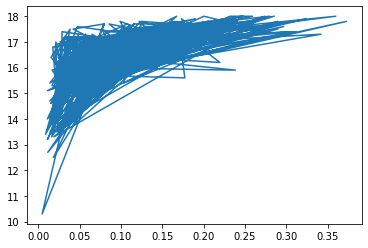

In [4]:
# Let's compare the magnitude of the 10th brightest member with the cluster's redshift
magnitudes = avail['Mag_10'].to_numpy()
redshifts = avail['Redshift'].to_numpy()

# Plot
plt.plot(redshifts, magnitudes)


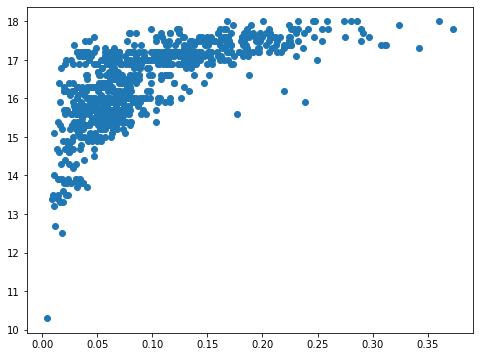

In [5]:
# The above plot connects the points, which isn't what we want. Let's try a scatter plot

# Specify the figure size to draw on (in inches!)
plt.figure(figsize=(8,6))
plt.scatter(redshifts, magnitudes)

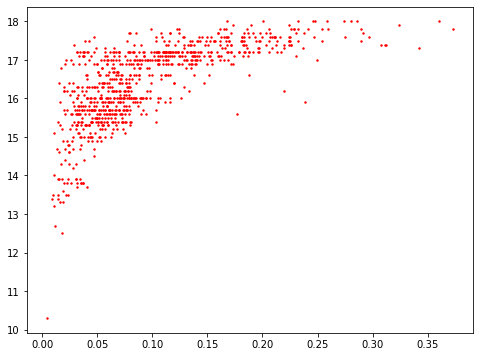

In [6]:
# Adding a couple of parameters to the `scatter` method and we can control the size of the point and the colour
plt.figure(figsize=(8,6))
plt.scatter(redshifts, magnitudes, c='r', s=2)

Text(0.5, 1.0, 'Galaxy cluster distance against magnitude of 10th brightest member')

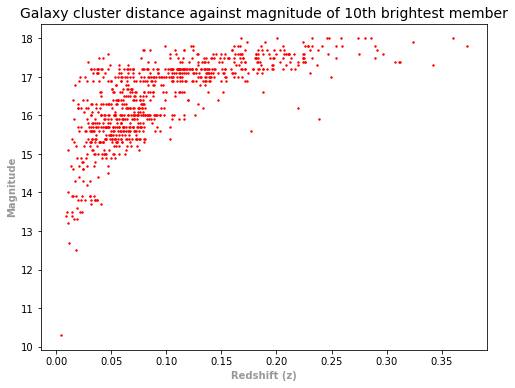

In [7]:
# And then we can add labels and some styling of the text

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
ax.scatter(redshifts, magnitudes, c='r', s=2)
ax.set_xlabel('Redshift (z)', fontweight='bold', color='#999999')
ax.set_ylabel('Magnitude', fontweight='bold', color='#999999')
ax.set_title('Galaxy cluster distance against magnitude of 10th brightest member', fontsize=14)

## Histogram plots

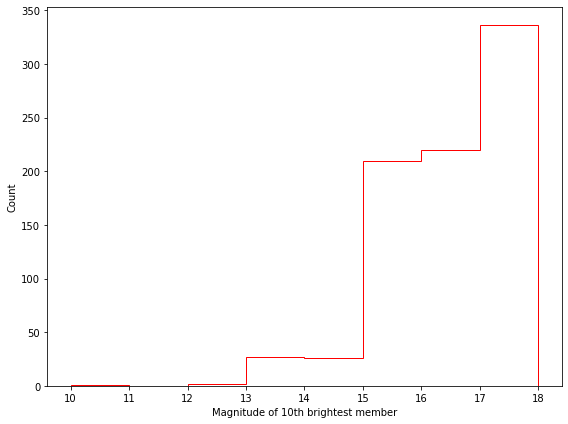

In [8]:
fig = plt.figure(figsize=(8,6), tight_layout=True)
ax = fig.add_subplot()

# `bins` specify how many values fall into a specified interval. Here we indicate the bin edges
ax.hist(magnitudes, color='red', histtype='step', bins=[10,11,12,13,14,15,16,17,18]);
ax.set_xlabel('Magnitude of 10th brightest member')
ax.set_ylabel('Count');

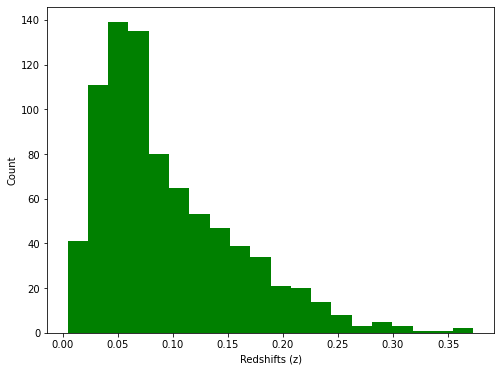

In [9]:
# Reset the figure area
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

# Make matplotlib determine the bin edges
ax.hist(redshifts, bins=20, histtype='stepfilled', color='g')
ax.set_xlabel('Redshifts (z)')
ax.set_ylabel('Count');